In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [23]:
# Load dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kernel: LINEAR
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



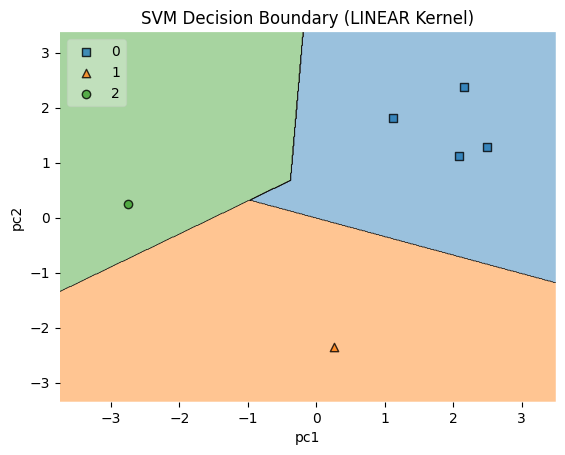

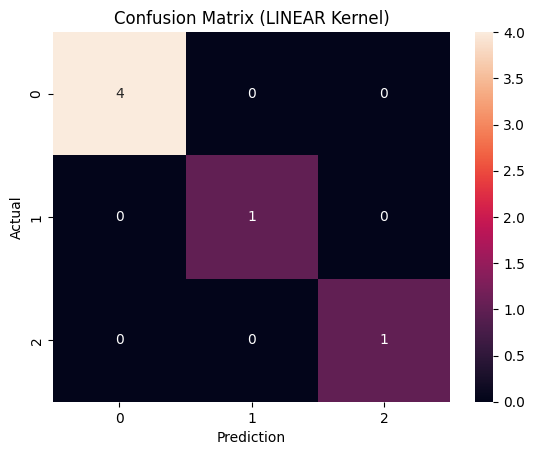

Kernel: POLY
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



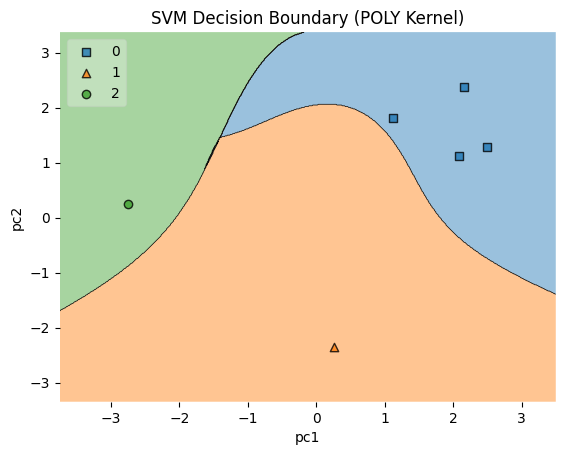

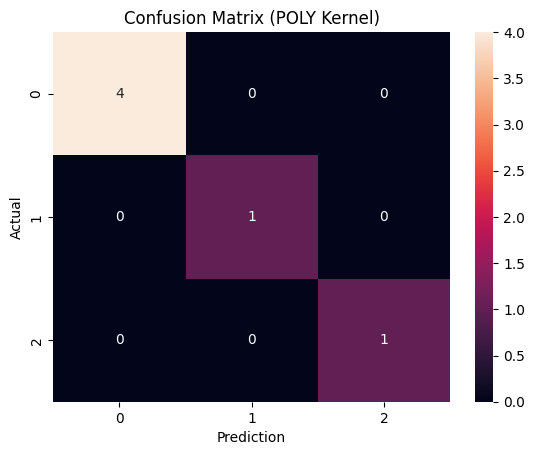

Kernel: RBF
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         4
     class_1       1.00      1.00      1.00         1
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



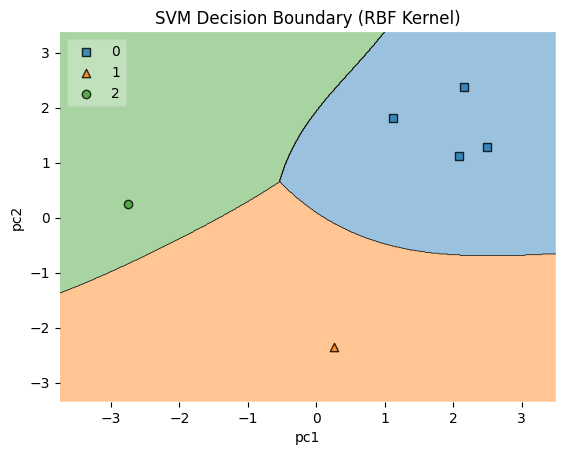

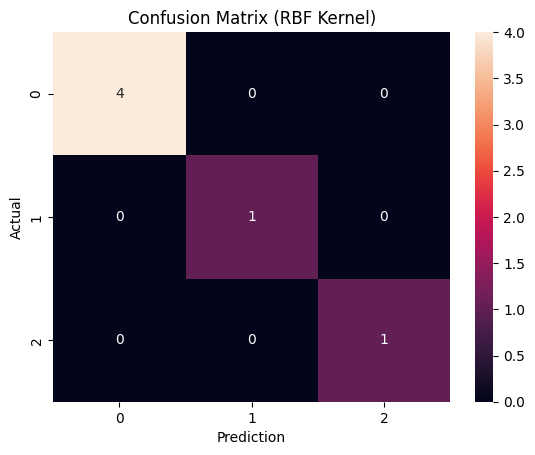

In [26]:
# Kernels to test
kernels = ["linear", "poly", "rbf"]

for kernel in kernels:
    print(f"Kernel: {kernel.upper()}")
    
    # Train SVM on full data
    model = SVC(kernel=kernel, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # PCA for visualization
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train)
    X_test_2D = pca.transform(X_test)
    
    # Train 2D SVM for plotting
    model_2D = SVC(kernel=kernel, gamma='scale', random_state=42)
    model_2D.fit(X_train_2D, y_train)
    
    
    # Plot decision boundary
    plot_decision_regions(X_test_2D, y_test, model_2D, legend =2)
    plt.title(f"SVM Decision Boundary ({kernel.upper()} Kernel)")
    plt.xlabel("pc1")
    plt.ylabel("pc2")
    plt.show()
        
    # Confusion Matrix
    sns.heatmap(cm,annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({kernel.upper()} Kernel)")
    plt.show()
